In [30]:
import pandas as pd
import numpy as np
import statistics as st
from scipy.stats import binom
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [8]:
# task 1

oreo_share = 0.15
n = 25

In [74]:
k = np.arange(0, 26)

prob = binom.pmf(k, n, oreo_share)
prob

t1a = pd.DataFrame({'Number of purchasers': k, 'Probability': prob})
t1a

,Number of purchasers,Probability
0,0,1.719781e-02
1,1,7.587269e-02
2,2,1.606716e-01
3,3,2.173792e-01
4,4,2.109857e-01
5,5,1.563776e-01
6,6,9.198684e-02
7,7,4.406092e-02
8,8,1.749478e-02
9,9,5.831593e-03


In [75]:
# a) Less than 5

lessThan5 = t1a['Probability'][:5]
lessThan5.sum()

0.682106967297771

In [76]:
# b) More than 10

moreThan10 = t1a['Probability'][11:]
moreThan10.sum()

0.0004946997113489004

In [49]:
# c) Calculating mean and standard deviation and showcasing in a tabular form

meanFive = st.mean(lessThan5)
meanTen = st.mean(moreThan10)

stdFive = st.stdev(lessThan5)
stdTen = st.stdev(moreThan10)

table1 = pd.DataFrame({'Less Than 5': [meanFive, stdFive],
                      'More Than 10': [meanTen, stdTen]}, index = ['Mean', 'Standard Deviation'])
table1

,Less Than 5,More Than 10
Mean,0.136421,0.000428
Standard Deviation,0.087439,0.000700


Text(0.5, 1.0, 'More than 10')

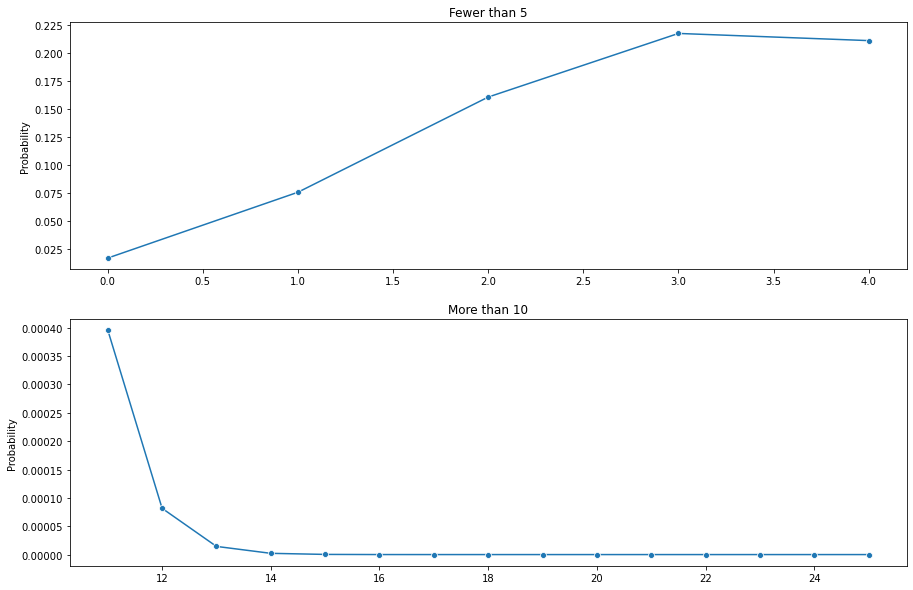

In [78]:
# d)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.lineplot(x = k[:5], y = lessThan5, marker = 'o')
plt.title('Fewer than 5')

plt.subplot(2, 1, 2)
sns.lineplot(x = k[11:], y = moreThan10, marker = 'o')
plt.title('More than 10')

In [65]:
# task 2

df = pd.read_excel('Screenshot 2022-12-22 010554.xlsx')
df.drop(['Unnamed: 1'], axis = 1, inplace = True)
df

,Week 1,week 2,week 3
0,3,1,5
1,6,2,3
2,4,4,5
3,6,0,3
4,2,2,5
5,3,6,4
6,1,5,7
7,5,4,3
8,1,2,4
9,0,5,8


In [106]:
temp = pd.concat([df['Week 1'], df['week 2'], df['week 3']])
rate = np.mean(temp)
rate

3.5

In [123]:
# a) probability of exactly 0 customers arriving in 5 minutes

n1 = 0

nocus = poisson.pmf(n1, rate)
print(nocus, 'Is the probability of exactly 0 customers arriving in 5 minutes')

0.0301973834223185 Is the probability of exactly 0 customers arriving in 5 minutes


In [127]:
# b) probability of more than 6 customers arriving in 5 minutes

grt6 = 1-poisson.cdf(6, rate)
grt6
print(grt6, 'Is the probability of more than 6 customers arriving in 5 minutes')

0.06528809702895366 Is the probability of more than 6 customers arriving in 5 minutes


In [133]:
# c) probability of less than 4 customers arriving in 10 minutes

n2 = np.arange(0, 4)
fewerthan4 = poisson.pmf(n2, (rate*2))
print(fewerthan4.sum(), 'Is the probability of less than 4 customers arriving in 10 minutes')

0.08176541624472157 Is the probability of less than 4 customers arriving in 10 minutes


In [147]:
# d) probability of between 3 and 6 customers arriving in 10 minutes

n3 = np.arange(3, 7)
bwt3and6 = poisson.pmf(n3, (rate*2))
bwt3and6.sum()
print(bwt3and6.sum(), 'Is the probability of between 3 and 6 customers arriving in 10 minutes')

0.42007489196817666 Is the probability of between 3 and 6 customers arriving in 10 minutes


In [136]:
# e) probability of exactly 8 customers arriving in 15 minutes

n4 = 8
exact8 = poisson.pmf(n4, (rate*3))
print(exact8, 'Is the probability of exactly 8 customers arriving in 15 minutes')

0.10090247270437917 Is the probability of exactly 8 customers arriving in 15 minutes


Text(0, 0.5, 'Probability')

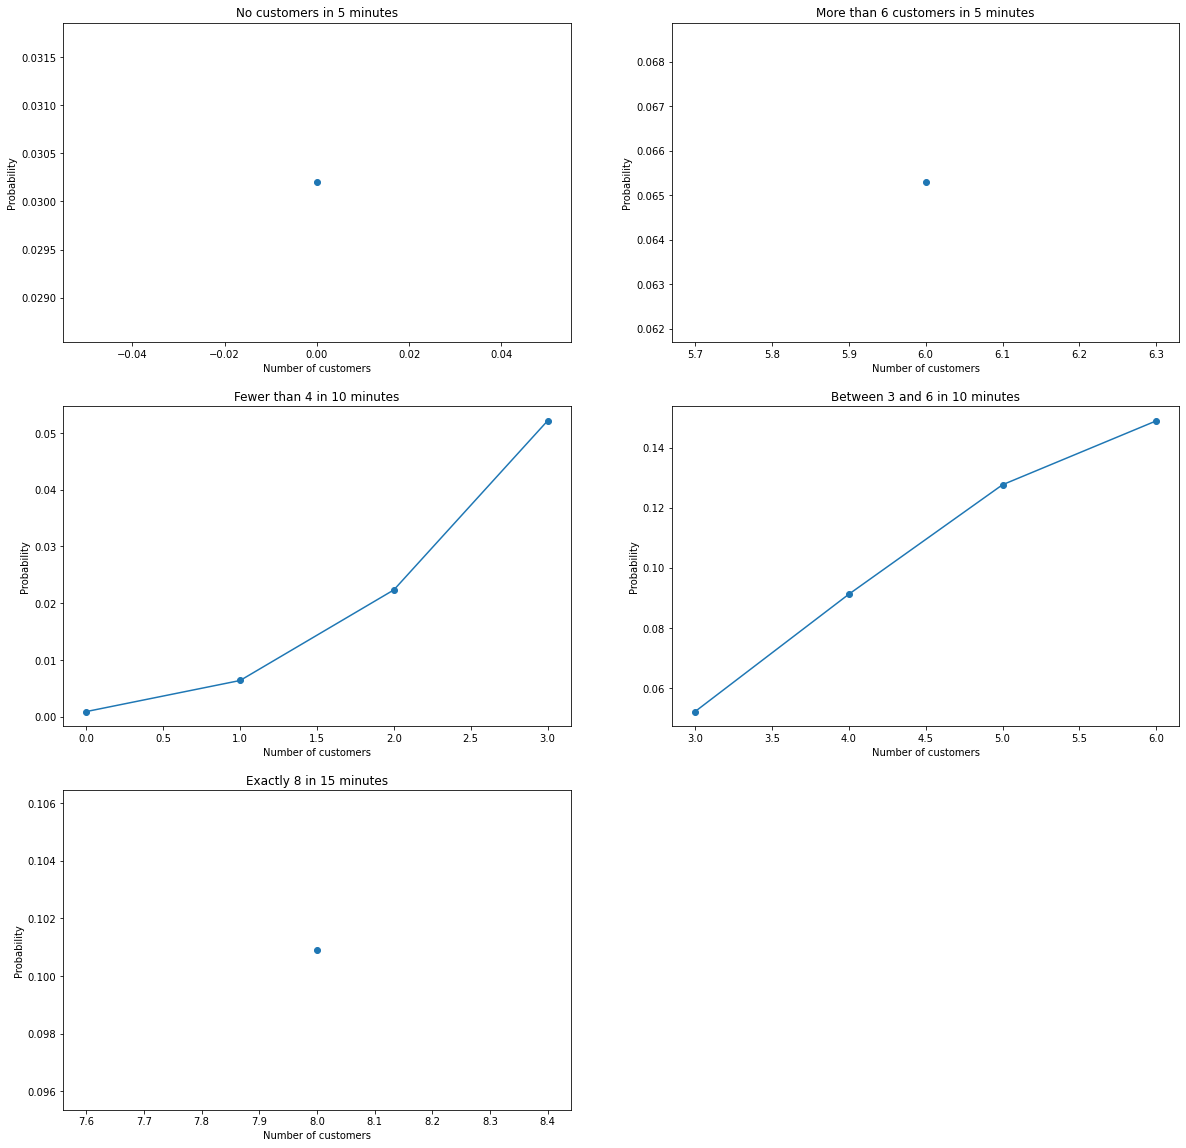

In [156]:
# f) graphs

plt.figure(figsize = (20, 20))


plt.subplot(3, 2, 1)
plt.plot(n1, nocus, 'o-')
plt.title('No customers in 5 minutes')
plt.xlabel('Number of customers')
plt.ylabel('Probability')

plt.subplot(3, 2, 2)
plt.plot(6, grt6, 'o-')
plt.title('More than 6 customers in 5 minutes')
plt.xlabel('Number of customers')
plt.ylabel('Probability')

plt.subplot(3, 2, 3)
plt.plot(n2, fewerthan4, 'o-')
plt.title('Fewer than 4 in 10 minutes')
plt.xlabel('Number of customers')
plt.ylabel('Probability')

plt.subplot(3, 2, 4)
plt.plot(n3, bwt3and6, 'o-')
plt.title('Between 3 and 6 in 10 minutes')
plt.xlabel('Number of customers')
plt.ylabel('Probability')

plt.subplot(3, 2, 5)
plt.plot(n4, exact8, 'o-')
plt.title('Exactly 8 in 15 minutes')
plt.xlabel('Number of customers')
plt.ylabel('Probability')